In [1]:
# Import neccessary libraries

import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [21]:
from datasets import load_from_disk
ds = load_from_disk("../data/processed/hf")
train_ds = ds["train"]
print(train_ds[0])  # View the first example
print(train_ds.features)
print(train_ds[0].keys())

{'image': <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=153x224 at 0x2117D6A99A0>, 'category1': 'women', 'category2': 'blouses', 'category3': None, 'text': 'This woman wears a short-sleeve T-shirt with color block patterns and a long pants. The T-shirt is with cotton fabric and its neckline is crew. The pants are with cotton fabric and solid color patterns. This female is wearing a ring on her finger. There is an accessory on her wrist.', 'item_ID': 'WOMEN-Blouses_Shirts-id_00002769-04_1_front'}
{'image': Image(mode=None, decode=True), 'category1': Value('string'), 'category2': Value('string'), 'category3': Value('float64'), 'text': Value('string'), 'item_ID': Value('string')}
dict_keys(['image', 'category1', 'category2', 'category3', 'text', 'item_ID'])


In [19]:
print(train_ds["category1"])  # See unique categories
print(train_ds.unique("category2")) 
print(train_ds["category3"]) 

Column(['women', 'men', 'women', 'women', 'women'])
['blouses', 'tees', 'dresses', 'sweaters', 'rompers', 'jackets', 'graphic', 'denim', 'shorts', 'pants', 'sweatshirts', 'cardigans', 'skirts', 'shirts', 'leggings', 'suiting']
Column([None, None, None, None, None])


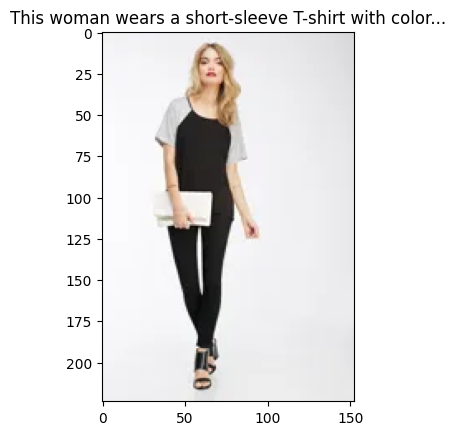

In [14]:
import matplotlib.pyplot as plt
example = train_ds[0]
plt.imshow(example["image"])
plt.title(example["text"][:50] + "...")
plt.show()

In [17]:
from datasets import load_from_disk
from collections import Counter

# Load dataset
ds = load_from_disk("../data/processed/hf")
train_ds = ds["train"]

print("=== DATASET ANALYSIS ===")

# 1. Total images
total_images = len(train_ds)
print(f"Total number of images: {total_images}")

# 2. Category distributions
print("\n=== CATEGORY DISTRIBUTIONS ===")

# Category 1 (men/women)
category1_counts = Counter(train_ds["category1"])
print("Category 1 (gender):")
for category, count in category1_counts.items():
    print(f"  {category}: {count}")

# Category 2 (clothing types)
category2_counts = Counter(train_ds["category2"])
print("\nCategory 2 (clothing types):")
for category, count in sorted(category2_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"  {category}: {count}")

# 3. Specific clothing types you're interested in
print("\n=== SPECIFIC CLOTHING TYPES ===")
specific_categories = ["top", "shirt", "t-shirt", "polo", "blouse", "sweater", "jacket"]
for category in specific_categories:
    count = sum(1 for item in train_ds["category2"] if category.lower() in item.lower())
    if count > 0:  # Only show if there are matches
        print(f"  {category}: {count}")

=== DATASET ANALYSIS ===
Total number of images: 38283

=== CATEGORY DISTRIBUTIONS ===
Category 1 (gender):
  women: 33789
  men: 4494

Category 2 (clothing types):
  tees: 11982
  blouses: 6742
  dresses: 6001
  sweaters: 2980
  jackets: 1949
  rompers: 1477
  shorts: 1356
  sweatshirts: 1267
  cardigans: 1258
  graphic: 1016
  skirts: 741
  pants: 668
  shirts: 504
  denim: 231
  leggings: 89
  suiting: 22

=== SPECIFIC CLOTHING TYPES ===
  shirt: 1771
  blouse: 6742
  sweater: 2980
  jacket: 1949
